[[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Text(0,0.5,'Mean Error')

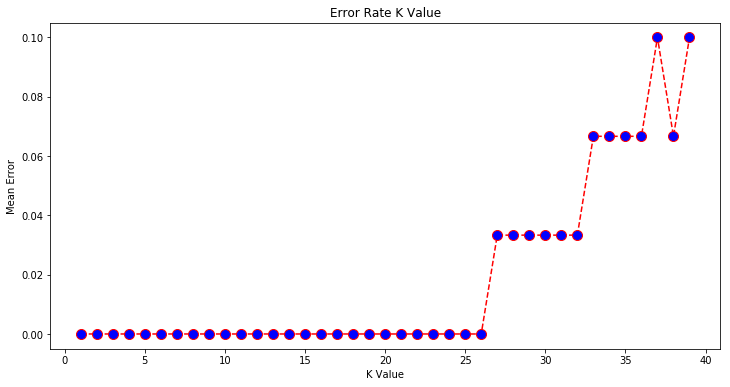

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# assign column names to the dataset

names = ['sepal-length', 'sepal-width','petal-length','petal-width','Class']

# Read the dataset to pandas dataframe

dataset = pd.read_csv(url, names = names)

# split dataset to attributes and labels

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,4].values

# create training and test splits

X_train, X_test, y_train, y_test = train_test_split(X , y,test_size = 0.20)

# feature scaling the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and predicting

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

#evaluating the algorithm

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# comparing error rate with k value
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
# plot 

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color = 'red',linestyle = 'dashed',marker = 'o', markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')